# this is a file for checking the distance to land
* given (lat, lon) pair, we can identify its closest distance to land
  * the file is located at original 0.04-degree data set:
    * Docs: http://oceancolor.gsfc.nasa.gov/cms/DOCS/DistFromCoast
    * Sources: http://oceancolor.gsfc.nasa.gov/DOCS/DistFromCoast/dist2coast.txt.bz2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# take a look at the first ten lines of the file
!bzcat "./dist2land_data/dist2coast.txt.bz2" | head -10

-179.98	89.98	712.935
-179.94	89.98	712.934
-179.9	89.98	712.933
-179.86	89.98	712.932
-179.82	89.98	712.932
-179.78	89.98	712.931
-179.74	89.98	712.93
-179.7	89.98	712.929
-179.66	89.98	712.928
-179.62	89.98	712.927

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./dist2land_data/dist2coast.txt.bz2, output file = (stdout)


In [3]:
# the resolution is 0.01 degree, which is 1 km
dist_db = pd.read_csv("./dist2land_data/dist2coast.txt.bz2", header=None, sep='\t', names=['lon','lat','dist'])

In [4]:
dist_db.head()
#dist_db.columns = ['lon','lat','dist']

#make a copy for safety
dist_db_copy =dist_db

In [5]:
mask= dist_db_copy.lon<0
mask

0            True
1            True
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10           True
11           True
12           True
13           True
14           True
15           True
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
40499970    False
40499971    False
40499972    False
40499973    False
40499974    False
40499975    False
40499976    False
40499977    False
40499978    False
40499979    False
40499980    False
40499981    False
40499982    False
40499983    False
40499984    False
40499985    False
40499986    False
40499987    False
40499988    False
40499989    False
40499990    False
40499991    False
40499992    False
40499993    False
40499994  

In [6]:
dist_db_copy.lon[mask] = dist_db_copy.loc[mask].lon + 360
print('after processing, the minimum longitude is %f4.3 and maximum is %f4.3' % (dist_db_copy.lon.min(),dist_db_copy.lon.max()) )

after processing, the minimum longitude is 0.0200004.3 and maximum is 359.9800004.3


In [7]:
# reduce dataset 
# Select only the arabian sea region
arabian_sea = (dist_db_copy.lon > 45) & (dist_db_copy.lon< 75) & (dist_db_copy.lat> 5) & (dist_db_copy.lat <28)
dist_db_arabian = dist_db_copy[arabian_sea]
print('dist_db_copy.shape is %s, dist_db_arabian.shape is %s' % (dist_db_copy.shape, dist_db_arabian.shape) )

dist_db_copy.shape is (40500000, 3), dist_db_arabian.shape is (431250, 3)


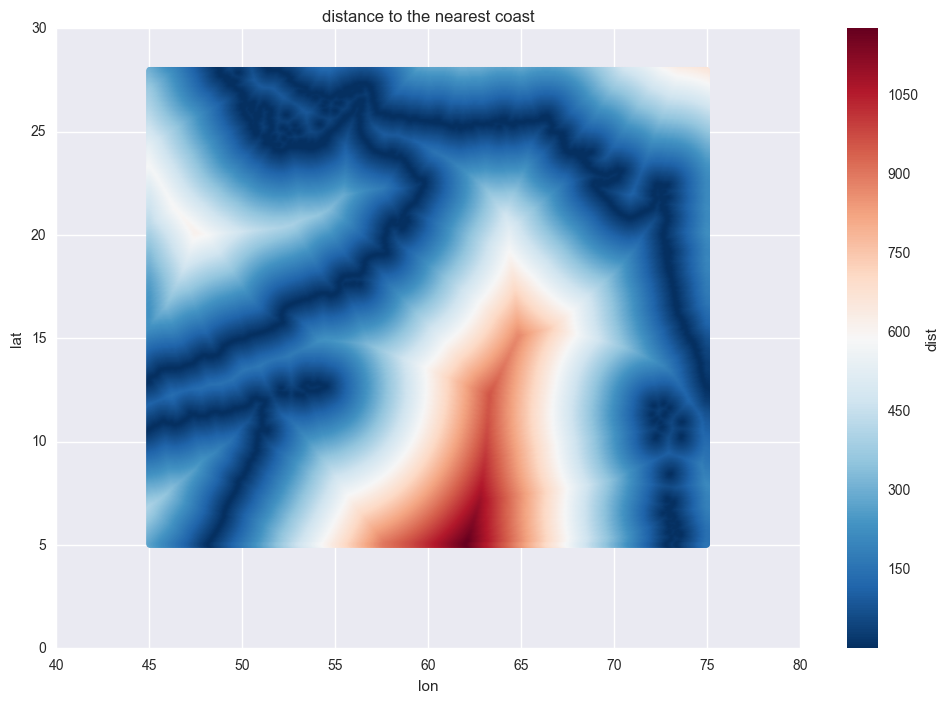

In [8]:
# visualize the unsigned(in-land & out-land) distance around global region
fig, ax  = plt.subplots(figsize=(12,8))
dist_db_arabian.plot(kind='scatter', x='lon', y='lat', c='dist', cmap='RdBu_r', edgecolor='none', ax=ax, title='distance to the nearest coast')

In [9]:
# transfer the dataframe into dataset, and to prepare for dataset.sel
dist_DS = xr.Dataset.from_dataframe(dist_db_arabian.set_index(['lon','lat']) ) # set time & id as the index); use reset_index to revert this operation
dist_DS

<xarray.Dataset>
Dimensions:  (lat: 575, lon: 750)
Coordinates:
  * lon      (lon) float64 45.02 45.06 45.1 45.14 45.18 45.22 45.26 45.3 ...
  * lat      (lat) float64 5.02 5.06 5.1 5.14 5.18 5.22 5.26 5.3 5.34 5.38 ...
Data variables:
    dist     (lon, lat) float64 280.4 283.3 286.3 289.3 292.3 295.3 298.3 ...

In [10]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
df_chl_out_2D = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_2D_modisa.csv',index_col='index')
df_chl_out_2D

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10
index,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664
4149,15707,2002-11-09,23.783812,-15.661781,0.000150,67.022625,12.926656,0.000075,-12.393500,1000.000000,NaN,0.153961,-0.812589,-0.004697,NaN
4167,34710,2002-11-09,26.598219,25.294281,0.000126,63.000156,17.952812,0.000065,-2.723375,0.001878,28.255188,0.501054,-0.300115,0.112797,-0.947702
4173,34721,2002-11-09,18.274406,12.886094,0.000124,68.182750,12.879281,0.000063,8.236687,0.001813,29.291313,0.150119,-0.823564,0.002713,-2.566549
4426,34710,2002-11-17,51.033437,42.687531,0.000152,62.227781,20.239094,0.000075,-25.647250,0.001815,27.549469,0.480306,-0.318482,-0.020748,NaN


In [11]:
'''
# load the 2D data, based on the floats data and the lagrangian rate of change on chl_a
import pandas as pd
test = pd.read_hdf('df_chl_out_2D.h5')
test

# a check
list(test.groupby(['id']))
'''

"\n# load the 8DOC data, based on the floats data and the lagrangian rate of change on chl_a\nimport pandas as pd\ntest = pd.read_hdf('df_chl_out_8DOC.h5')\ntest\n\n# a check\nlist(test.groupby(['id']))\n"

In [12]:
# check the lat and lon
# df_chl_out_2D.lon
# df_chl_out_2D.lat

In [13]:
tmp_dist = dist_DS.dist.sel_points(lon=list(df_chl_out_2D.lon),lat=list(df_chl_out_2D.lat), method='nearest')
print('the count of nan vaues in tmpAll is',tmp_dist.to_series().isnull().sum())
tmp_dist.to_series()

the count of nan vaues in tmpAll is 0


points
0      520.4050
1      822.7430
2      584.0640
3      545.1970
4      858.3870
5      580.7750
6      513.0270
7      457.1560
8      327.3360
9      481.8100
10     713.3930
11      68.7629
12     258.0500
13     528.2990
14     448.3200
15     360.6660
16     795.6110
17     241.1240
18     351.7960
19     685.7980
20     866.4100
21     381.1380
22     703.3780
23     940.2960
24     456.8570
25     668.1950
26     647.3570
27     273.2370
28      70.0870
29     639.3160
         ...   
653    940.9580
654    640.4780
655    953.3690
656    238.7190
657    662.0290
658    868.9360
659    251.8690
660    635.7060
661    859.9870
662    261.9900
663    616.6080
664    582.4100
665    862.7080
666    576.1700
667    295.7130
668    506.9260
669    576.3870
670    443.0950
671    349.1780
672    415.5460
673    570.3880
674    414.2320
675    391.6030
676    363.7230
677    577.0800
678    760.1980
679    411.6270
680    576.3650
681    331.8890
682    569.0470
Name: dist, dtype

after editing the dataframe the nan values in 'chl_a' is 0


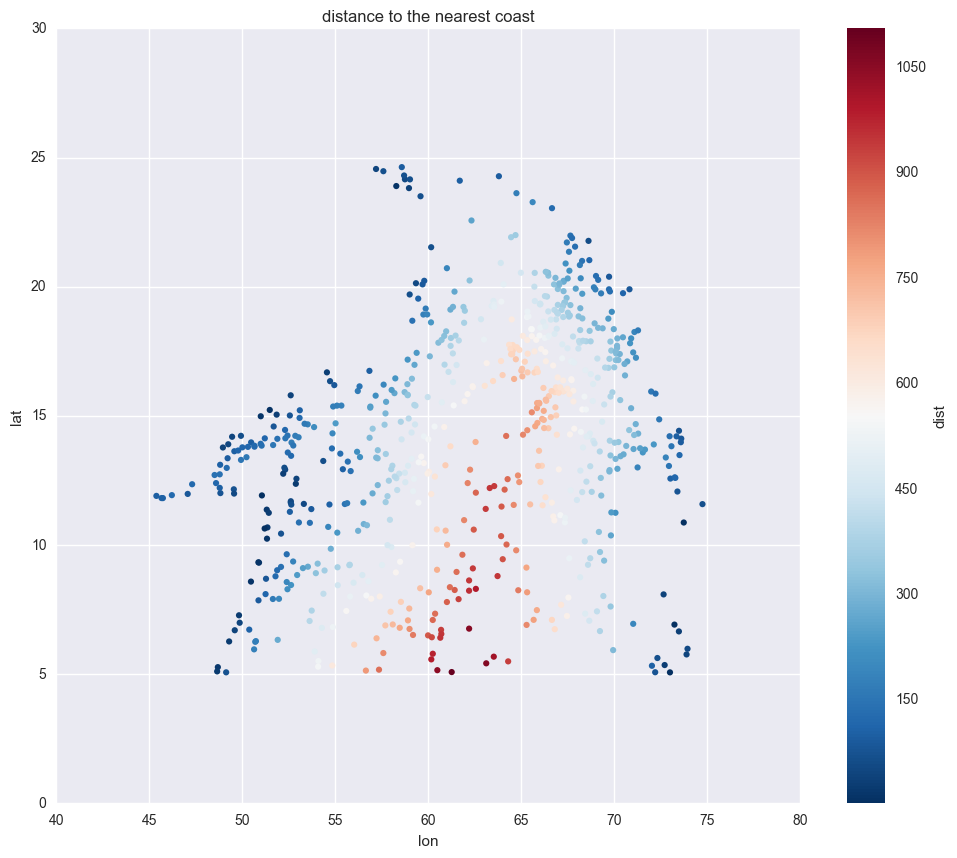

In [14]:
# tmp.to_series() to transfer it from xarray dataset to series
df_chl_out_2D['dist'] = pd.Series(np.array(tmp_dist.to_series()), index=df_chl_out_2D.index)
print("after editing the dataframe the nan values in 'chl_a' is",df_chl_out_2D.dist.isnull().sum() )  # they should be the same values as above

# take a look at the data
df_chl_out_2D

# visualize the float around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_2D.plot(kind='scatter', x='lon', y='lat', c='dist', cmap='RdBu_r', edgecolor='none', ax=ax, title = 'distance to the nearest coast')

In [15]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_2D_3.csv --  {lat, lon, temp, chlor_a, dist}
# 3 represents 3 features: {temp, chlor_a, dist}
df_chl_out_2D.to_csv('df_chl_out_2D_modisa_3.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_2D_modisa_3.csv', index_col='index')

# a check
test.head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN,520.405
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784,822.743
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250,584.064
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664,858.387


In [16]:
# summary
# do a transformation to make the longitude positive
# transform the dataframe into dataset
# carry out the interpolation on dataset and transform it into a dataframe

# think about output the data from 2D interpolations as a binary file to save time
# 

In [17]:
from datetime import datetime, timedelta
datetime(2002, 1, 1) + timedelta(days=184)

datetime.datetime(2002, 7, 4, 0, 0)